# Matemática para Ciencia de los Datos
# Trabajo Práctico 5

Profesor: Juan Luis Crespo Mariño (basado en trabajo previo de Luis Alexánder Calvo Valverde)

Instituto Tecnológico de Costa Rica,

Programa Ciencia de Datos

---

Fecha de entrega: 19 de noviembre de 2024, a más tardar a las 6:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ).

Estudiante:
1. Luis Felipe Quesada Miranda


---

**Pregunta 1 (30 puntos)**

Para la siguiente función:


$f_{2}\left(x_{1},x_{2}\right)=x_{1}e^{\left(-x_{1}^{2}-x_{2}^{2}\right)}$



Realice lo siguiente:

En python, genere un gráfico, puede usar la función meshgrid (Use la biblioteca plotly).








<Figure size 640x480 with 0 Axes>

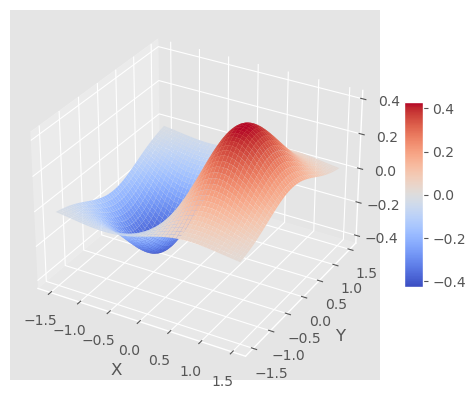

In [54]:
#import numpy as np
#import plotly.express as px
#import matplotlib.pyplot as plt
#from mpl_toolkits import mplot3d


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import random
import plotly.graph_objects as go
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits import mplot3d
import math

plt.style.use('ggplot')



def funcion(x, y):

  return x*math.exp(-x**2-y**2)

x = y = np.arange(-1.5, 1.5, 0.01)
X, Y = np.meshgrid(x, y)
zs = np.array([funcion(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

# Manejo del gráfico
plt.clf()
fig = plt.figure()
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, Z,cmap=cm.coolwarm )
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()







---

**Pregunta 2 (20 puntos)**

Para la siguiente función multivariable: $z=f\left(x,y\right)=3x^{2}+2y^{4}$, calcule el vector gradiente manualmente.  Evalúelo para el punto $P_{1}=\left(7.4,-6.3\right)$. Luego calcule la magnitud (norma Euclidiana) del vector gradiente para el punto. Finalmente normalice el vector resultante.

--No se require programación en python--.



$$
z=f(x,y)=3x^2 \\
\nabla f= {\frac{\partial f}{\partial x}}\hat{i} +{\frac{\partial f}{\partial y}}\hat{j} \\
\text{Gradiente de f:}\\
\nabla f= 6x\hat{i} + 8y^3\hat{j}\\
\text{Gradiente de f evaluado en el punto $P_1$:}\\
\nabla f_{(7.4,-6.3)}=44.4\hat{i} -2000,376\hat{j}\\
\newline\\
\text{Vector u:}\\
\vec{u}=\nabla f_{(7.4,-6.3)}\\
\left\| \vec{u} \right\|=\sqrt[]{{44.4}^2+{(-2000,376)}^2}\\


\text{Norma Euclidiana}\\
\left\| \vec{u} \right\|=2000,868687 \\


\frac {\vec{u}}{\left\| \vec{u} \right\|}=\frac{44,4}{2000,868687}\hat{i} -\frac{2000,376}{2000,868687}\hat{j}   \\
\text{Vector normalizado}\\
\frac {\vec{u}}{\left\| \vec{u} \right\|}=0,022\hat{i} -0,999\hat{j}\\
$$

---

**Pregunta 3 (20 puntos)**

Calcule el vector gradiente $\nabla f$ para la siguiente función multi-variable $f: \mathbb{R}^2\rightarrow\mathbb{R}$.

$f(x,y) = x^3+y^2$  

    * Además, evalúe en
$\begin{bmatrix}1\\1\end{bmatrix}$.






In [36]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from sympy.vector import CoordSys3D


#import sympy as sp
#from sympy.abc import x, y
#from sympy import Eq
#from sympy.vector import CoordSys3D, gradient

x,y = sy.symbols('x y')
f=x**3+y**2
print("f(x,y)=" , f)

dfdx=sy.diff(f,x)
print("df/dx = ", dfdx)

dfdy=sy.diff(f, y)
print("df/dy = ", dfdy)

V=[dfdx, dfdy]
print("∇f =", V)

dfdx1=dfdx.subs([(x, 1), (y, 1)])
dfdy1=dfdy.subs([(x, 1), (y, 1)])


V1_1=[dfdx1, dfdy1]

print("∇f (1,1) =", V1_1)

f(x,y)= x**3 + y**2
df/dx =  3*x**2
df/dy =  2*y
∇f = [3*x**2, 2*y]
∇f (1,1) = [3, 2]


---

**Pregunta 4 (30 puntos)**

La ténica del SVD puede ser utiliada para la compresión de imágenes. Por ejemplo, una imagen **[1]** de $m×n$ pixels en escala de grises puede ser representada como una matriz $A \in R^{m×n}$ cuyos elementos $a_{ij}$ representan la intensidad del pixel $(i, j)$. En particular, una imagen contiene mucha información redundante, es decir, que puede ser eliminada sin que el efecto visual sea notable.

Se podría sustituir la matriz $A$ por otra matriz $B$ de rango menor.

Consideremos:

Teorema: Sean $\sigma_{1} \geq \sigma_{2} \geq \cdots \geq \sigma_{r} > 0 $, valores singulares no  nulos de $A \in C^{m×n}$. Entonces para cada $k < r$, la distancia desde $A$ al conjunto de matrices de rango $k$ en la norma $\left\Vert \cdot \right\Vert _{2} $ es:

$$\sigma_{k+1} = \min\limits_{rank(B)=k} \left\Vert A - B \right\Vert _{2}$$

Por tanto, si $A = UDV^T $ es la descomposición en valores singulares de $A$, la matriz de rango $k$ de mejor aproximación a $A$ es:

$$B = U
\begin{bmatrix} D  &  0      \\
                0  &  0
\end{bmatrix} V^T , D = diag(\sigma_1, \sigma_2, \cdots , \sigma_k)$$

Si $U_k$ y $V_k$ son las matrices compuestas por las primeras $k$ columnas de $U$ y $V$,  respectivamente, entonces se puede decir que (fórmula **f_1**):

$$B = U_k D V_{k}^{T}$$

logrando codificar la imagen aproximada por medio de matrices de menor tamaño.

Por otra parte, las imágenes en color **[2]** se representan en Python como matrices numéricas tridimensionales, la tercera dimensión para representar los valores de color (rojo, verde azul). Sin embargo, el método SVD es aplicable a matrices bidimensionales. Así que tenemos que encontrar una manera de convertir la matriz tridimensional en matrices bidimensionales, aplicar SVD y reconstruirla como una matriz  tridimensional. Hay dos maneras de hacerlo. Mostraremos ambos métodos a continuación.
1. método de remodelación: Este método implica aplanar la tercera dimensión de la matriz de imágenes en la segunda dimensión utilizando el método de reshape.
1. Método de capa:   Este método trata una imagen en color como una pila de 3 imágenes bidimensionales separadas (capas roja, azul y verde). Se aplica la reconstrucción SVD truncada en cada capa bidimensional por separado y luego se vuelven a juntar las capas reconstruidas.

Investigue uno de estos métodos y aplique un procedimiento similar al del cuaderno visto en clase, utilizando la figura adjunta "Imagen1.jpg" (**procesando la imagen a color, NO en escala de grises**).


1. Cargue la imagen adjunta, "Perrita.jpg".
1. Muestre su contenido en pantalla.
1. Calcule la descomposicíón en valores singulares.
1. Sea $k$ los primeros $k_{ésimos}$ primeros valores singulares. Para $k \in [5, 10, 50, 100, 300, 700, 900]$, haga:
    1. Trunque las matrices U, D y V dejando sólo aquellas columnas que corresponden a los valores singulares seleccionados ($k$), obteniendo las matrices $U_k$, $D$ y $V_k$.
    1. Muestre el tamaño de cada una de las matrices.
    1. Calcule la matriz $B$ que aproxima a $A$ segúnn la fórmula **f_1** (ver arriba).
    1. Muestre la imagen correspondiente al contenido de la matriz $B$.
    
**[1]** Texto base: https://w3.ual.es/~andrei/Practicas/practica14.pdf

**[2]** Texto base de Ramesh Putalapattu.

Detalles de img:  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=720x960 at 0x27780F724E0>



Resolución de la imagen original:  (960, 720)





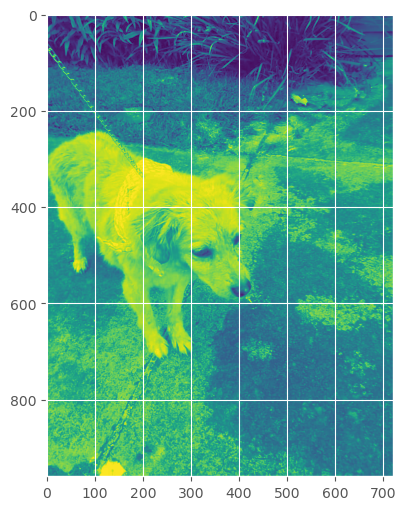




Dimensiones de U: (960, 960)
Dimensiones de D: (720,)
Dimensiones de V: (720, 720)





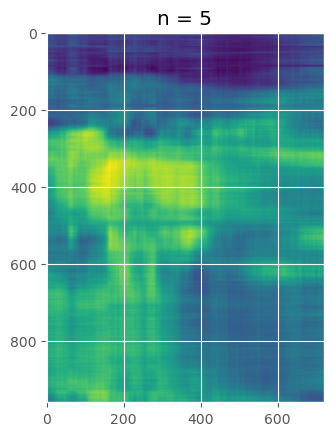

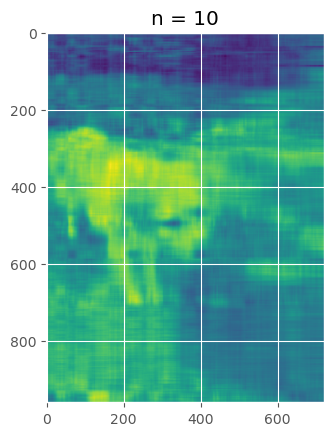

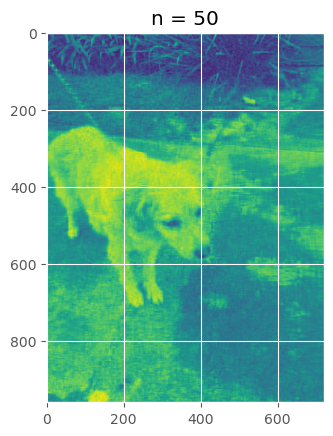

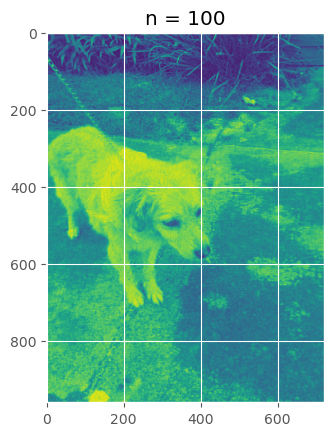

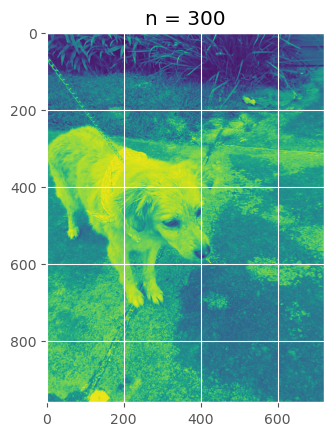

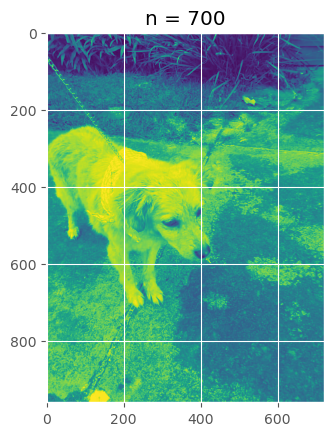

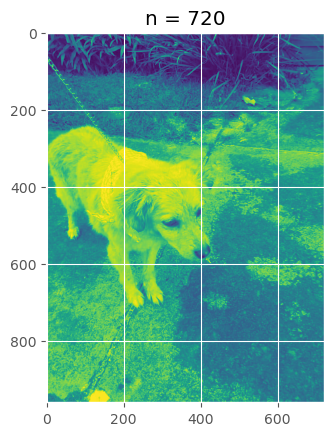

In [81]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats
import sklearn.datasets
import sklearn.preprocessing


from PIL import Image

plt.style.use('ggplot')
img = Image.open('perrita.jpg')
print("Detalles de img: ", img)


# convert to numpy array
imgmat = np.array(list(img.getdata(band=0)), float)

# Reshape according to orginal image dimensions
imgmat.shape = (img.size[1], img.size[0])

print("\n\n")
print("Resolución de la imagen original: ", imgmat.shape)
print("\n\n")

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='viridis')
plt.show()

U, D, V = np.linalg.svd(imgmat)
#print( D )

print("\n\n")
print("Dimensiones de U:", U.shape)
print("Dimensiones de D:", D.shape)
print("Dimensiones de V:", V.shape)
print("\n\n")

for i in [5, 10, 50, 100, 300, 700, 720]:
    #reconstimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
    reconstimg = np.matmul( np.matmul( np.matrix(U[:, :i]) , np.diag(D[:i]) ) , np.matrix(V[:i, :]) )
    plt.imshow(reconstimg, cmap='viridis')
    title = "n = %s" % i
    plt.title(title)
    plt.show()